<a href="https://colab.research.google.com/github/sukhyun1017/pytorch-study/blob/main/pytorch_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

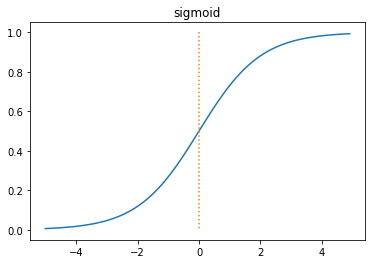

In [25]:
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],':') # 가운데 점선
plt.title('sigmoid')
plt.show()

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [31]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
H = torch.sigmoid(x_train.matmul(W) + b)

In [28]:
losses = -(y_train * torch.log(H) + 
           (1 - y_train) * torch.log(1 -H))
print(losses.mean())

tensor(0.6931, grad_fn=<MeanBackward0>)


In [29]:
F.binary_cross_entropy(H, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [33]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    #H(x) 계산
    H = torch.sigmoid(x_train.matmul(W) + b)
    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = F.binary_cross_entropy(H, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [34]:
prediction = H >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


nn.Module 로 회귀 구현

In [35]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [42]:
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [38]:
model(x_train)

tensor([[0.3382],
        [0.2405],
        [0.1317],
        [0.0929],
        [0.0550],
        [0.0295]], grad_fn=<SigmoidBackward0>)

In [54]:
# 모델 초기화
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 20 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum()/ len(y_train) # 정확도를 계산
        
      
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))
       

Epoch    0/1000 Cost: 1.021030 Accuracy 16.67%
Epoch   20/1000 Cost: 0.609775 Accuracy 83.33%
Epoch   40/1000 Cost: 0.412127 Accuracy 83.33%
Epoch   60/1000 Cost: 0.254751 Accuracy 83.33%
Epoch   80/1000 Cost: 0.161179 Accuracy 100.00%
Epoch  100/1000 Cost: 0.135936 Accuracy 100.00%
Epoch  120/1000 Cost: 0.119580 Accuracy 100.00%
Epoch  140/1000 Cost: 0.106797 Accuracy 100.00%
Epoch  160/1000 Cost: 0.096533 Accuracy 100.00%
Epoch  180/1000 Cost: 0.088107 Accuracy 100.00%
Epoch  200/1000 Cost: 0.081066 Accuracy 100.00%
Epoch  220/1000 Cost: 0.075091 Accuracy 100.00%
Epoch  240/1000 Cost: 0.069955 Accuracy 100.00%
Epoch  260/1000 Cost: 0.065493 Accuracy 100.00%
Epoch  280/1000 Cost: 0.061577 Accuracy 100.00%
Epoch  300/1000 Cost: 0.058114 Accuracy 100.00%
Epoch  320/1000 Cost: 0.055027 Accuracy 100.00%
Epoch  340/1000 Cost: 0.052258 Accuracy 100.00%
Epoch  360/1000 Cost: 0.049760 Accuracy 100.00%
Epoch  380/1000 Cost: 0.047494 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045429 Accuracy 100.

class 로 모델 구현

In [56]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.logistic = nn.Sequential(
            nn.Linear(2, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.logistic(x) 

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum() / len(y_train) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))